In [1]:
# ANALISI DATASET 1

In [2]:
from netCDF4 import Dataset

nc = Dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

type(nc)

netCDF4._netCDF4.Dataset

In [3]:
for i in nc.variables:
    print('{} : {}'.format(nc.variables[i].name, nc.variables[i].datatype))

lat : float32
lon : float32
time : float32
agl : float32


In [4]:
import xarray as xr

ncxr = xr.open_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc') # Copernicus (0.1°x0.1°)

ncxr

<xarray.Dataset>
Dimensions:  (lat: 1800, lon: 3600, time: 252)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.95 -179.85 -179.75 ... 179.75 179.85 179.95
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2020-12-15
Data variables:
    agl      (time, lat, lon) float32 ...
Attributes:
    Conventions:        CF-1.6
    projection:         latlon
    authors:            N.Elguindi and C.Granier
    description:        Monthly emissions from CAMS-GLOB-ANT_v4.2 nh3 emissio...
    product_version:    v4.2
    title:              CAMS Global anthropogenic emissions
    institution:        Laboratoire d'Aérologie/CNRS 
    source:             EDGARv4.3.2 emissions up to 2010 and CEDS emissions u...
    references:         Granier, C., S. Darras, H. Denier van der Gon, J. Dou...
    distribution_date:  2020-11-19
    history:            lun. 29 juin 2020 18:42: Process from monthly to mont...

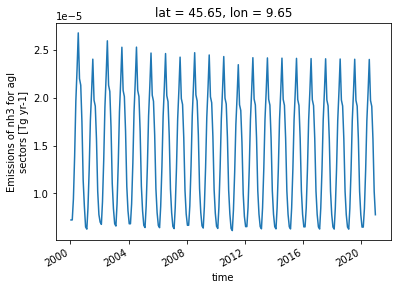

In [5]:
agl = ncxr['agl']

dsloc = ncxr.sel(lon=9.60,lat=45.69,method='nearest')
dsloc['agl'].plot()

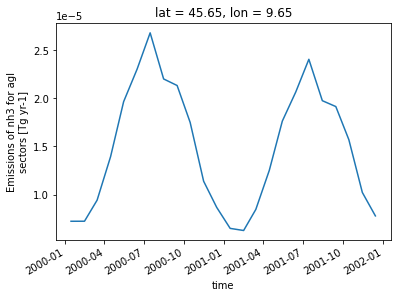

In [6]:
dsloc = ncxr.sel(lon=9.65,lat=45.69,method='nearest')
dsloc['agl'][0:24].plot()

In [7]:
# ANALISI DATASET 2

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly.nc')  # Copernicus (0.1°x0.1°)

dims = ds.dims
coords = ds.coords

print(ds.attrs['description'])

# Approx bounding box Lombardia
lat_bounds = slice(45, 46.2)
lon_bounds = slice(8.60, 10.60)

agl = ds.agl.sel(lat=lat_bounds, lon=lon_bounds)

Monthly emissions from CAMS-GLOB-ANT_v4.2 nh3 emissions (annual emission*monthly profile)


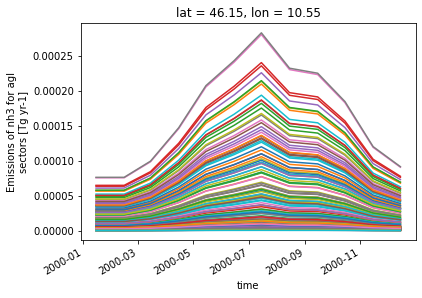

In [9]:
plt.figure()
for i in range(12):
    for j in range(20):
        agl[:, i, j][0:12].plot()

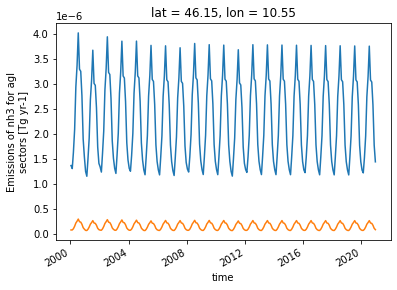

In [10]:
plt.figure()
agl[:, 0, 0].plot()
agl[:, -1, -1].plot()

In [11]:
# ANALISI DATASET TEST 3

<AxesSubplot:>

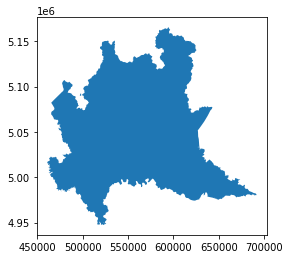

In [12]:
import geopandas as gpd

df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Regione_2015.shp')
df.plot()

<AxesSubplot:>

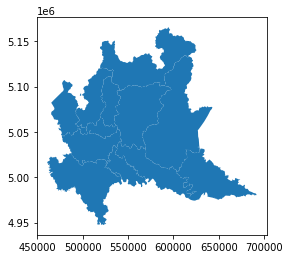

In [13]:
df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Province_2015.shp')
df.plot()

<AxesSubplot:>

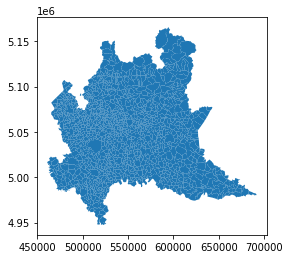

In [14]:
df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Comuni_2015.shp')
df.plot()

In [15]:
# Re-Projecting data geometry
print(df.columns)
print(df.crs)

df_wgs84 = df.to_crs({'init': 'epsg:4326'}) 
df_wgs84.head(2)

Index(['CLASSREF', 'BELFIORE', 'COD_ISTATN', 'NOME_COM', 'COD_PRO', 'NOME_PRO',
       'COD_CMO', 'NOME_CMO', 'COD_ASL', 'NOME_ASL', 'COD_REG', 'NOME_REG',
       'ANNO', 'ISTAT', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')
epsg:32632


,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,COD_CMO,NOME_CMO,COD_ASL,NOME_ASL,COD_REG,NOME_REG,ANNO,ISTAT,SHAPE_AREA,SHAPE_LEN,geometry
0,f485eb84-c17f-4feb-b000-410dced701d1,I529,03013211,SCHIGNANO,013,COMO,ZO15,LARIO INTELVESE,3,COMO,03,LOMBARDIA,1980,13211,1.005798e+07,15742.310544,"POLYGON ((9.07619 45.90353, 9.07624 45.90354, ..."
1,e12f7129-981d-4b00-86f1-18d6bf0d5414,I611,03013212,SENNA COMASCO,013,COMO,None,None,3,COMO,03,LOMBARDIA,2014,13212,2.666036e+06,11135.449310,"POLYGON ((9.08513 45.74859, 9.08506 45.74858, ..."


<AxesSubplot:>

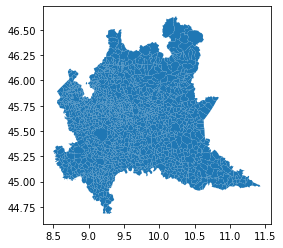

In [16]:
df_wgs84.plot()